In [90]:
!pip install kagglehub --quiet

In [91]:
import pandas as pd 
import kagglehub as kh
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [92]:
# Download latest version
path = kh.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hawra\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [93]:
# Show the actual downloaded files
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['mitbih_test.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'ptbdb_normal.csv']


In [94]:
def load_data(path):
    import os
    import pandas as pd

    # Load train and test datasets directly
    train = pd.read_csv(os.path.join(path, "mitbih_train.csv"), header=None)
    test = pd.read_csv(os.path.join(path, "mitbih_test.csv"), header=None)

    # Split into features and labels
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]

    X_test = test.iloc[:, :-1]
    y_test = test.iloc[:, -1]

    return X_train, X_test, y_train, y_test


In [95]:
X_train, X_test, y_train, y_test = load_data(path)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (87554, 187)
Testing samples: (21892, 187)


In [96]:
print("First 5 samples of the training set:")
X_train.head(5)


First 5 samples of the training set:


,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
print("different classes in the training set:")
y_train.unique()

different classes in the training set:


array([0., 1., 2., 3., 4.])

In [98]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((87554, 187), (87554,), (21892, 187), (21892,))

In [99]:
print("\nClass distribution:")
print(X_train.iloc[:, -1].value_counts().sort_index())


Class distribution:
186
0.000000    86769
0.003704        1
0.005300        1
0.011928        1
0.017021        1
            ...  
0.884393        1
0.903766        1
0.926531        1
0.991453        1
1.000000        2
Name: count, Length: 748, dtype: int64


In [100]:
print("Train shape:", X_train.shape)
print("Sample row:\n", X_train.iloc[0])

Train shape: (87554, 187)
Sample row:
 0      0.977941
1      0.926471
2      0.681373
3      0.245098
4      0.154412
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 0, Length: 187, dtype: float64


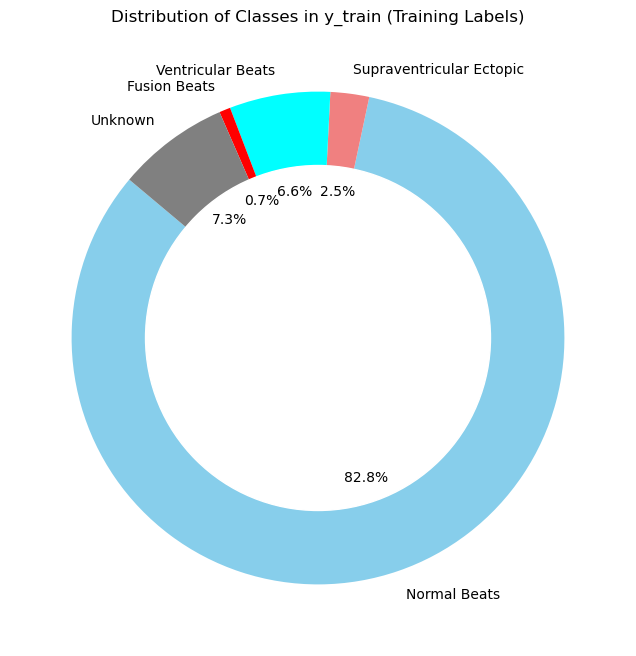

In [101]:
class_counts = y_train.value_counts().sort_index()

label_map = {
    0: 'Normal Beats',
    1: 'Supraventricular Ectopic',
    2: 'Ventricular Beats',
    3: 'Fusion Beats',
    4: 'Unknown'
}

labels = [label_map[int(cls)] for cls in class_counts.index]

colors = ['skyblue', 'lightcoral', 'cyan', 'red', 'grey']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')

plt.pie(
    class_counts,
    labels=labels,
    colors=colors[:len(labels)],
    autopct='%1.1f%%',
    startangle=140
)
plt.gca().add_artist(circle)
plt.title('Distribution of Classes in y_train (Training Labels)')
plt.show()


label numarical labels with categorical label.

In [102]:
def load_data(path):
    # Load CSVs
    normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
    abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)

    # Combine them
    data = pd.concat([normal, abnormal], ignore_index=True)

    # Split features and labels (last column is label)
    X = data.iloc[:, :-1]  # all columns except last
    y = data.iloc[:, -1]   # last column is label

    return X, y

In [103]:
X, y = load_data(path)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("Label distribution:\n", y.value_counts())

Features shape: (14552, 187)
Labels shape: (14552,)
Label distribution:
 187
1.0    10506
0.0     4046
Name: count, dtype: int64


In [104]:
normal = pd.read_csv(os.path.join(path, "ptbdb_normal.csv"), header=None)
abnormal = pd.read_csv(os.path.join(path, "ptbdb_abnormal.csv"), header=None)
head = normal.head()
print("First 5 rows of normal data:\n", head)

First 5 rows of normal data:
         0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.

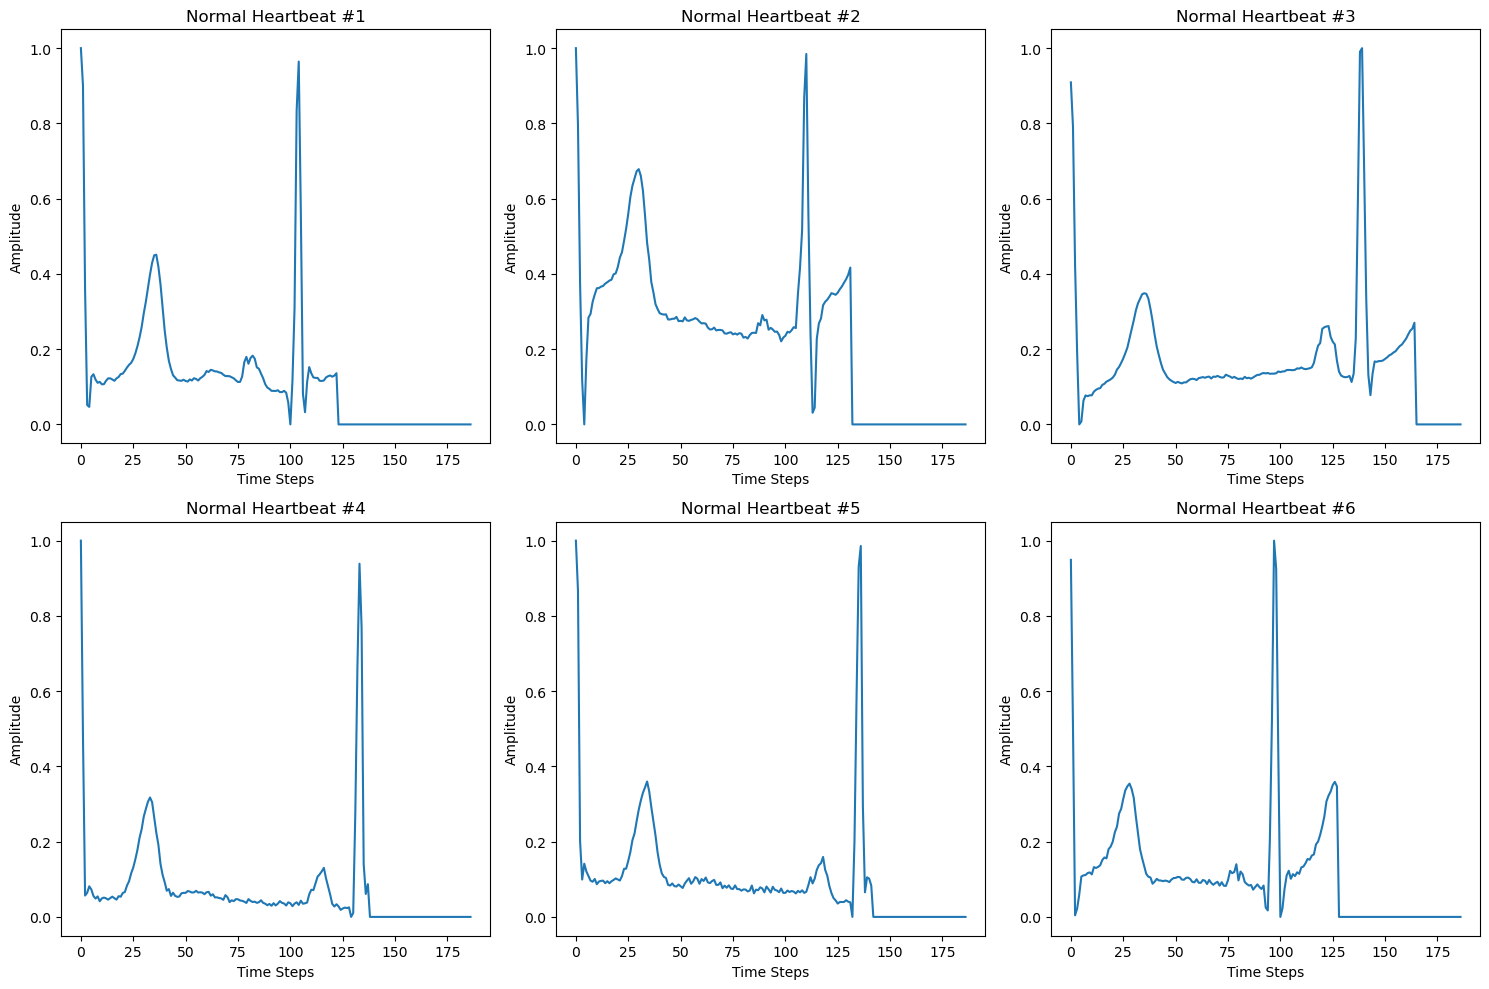

In [105]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.flatten()

# Plot 6 normal heartbeats starting from index 0
for i in range(6):
    ax[i].plot(X.iloc[i])
    ax[i].set_title(f"Normal Heartbeat #{i + 1}")
    ax[i].set_xlabel("Time Steps")
    ax[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()



In [106]:
head = abnormal.head()
print("First 5 rows of abnormal data:\n", head)

First 5 rows of abnormal data:
         0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  

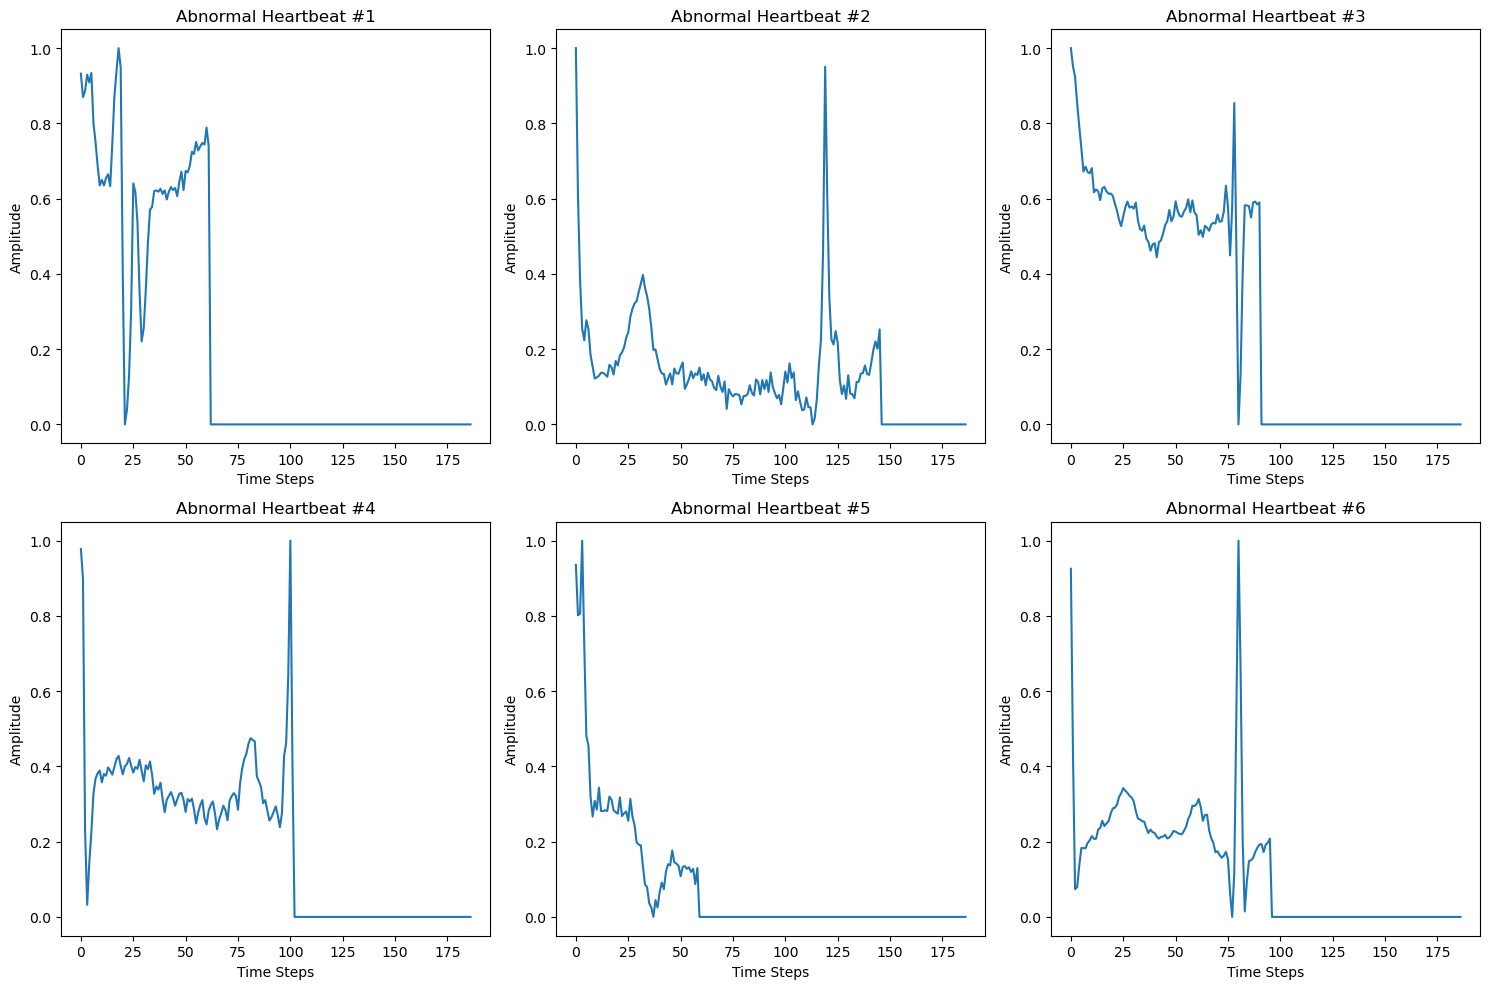

In [107]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax = ax.flatten()

# Plot 6 abnormal heartbeats starting at the index after all normal samples
for i in range(6):
    sample_index = len(normal) + i
    ax[i].plot(X.iloc[sample_index])
    ax[i].set_title(f"Abnormal Heartbeat #{i + 1}")
    ax[i].set_xlabel("Time Steps")
    ax[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

Scatter plot for train data

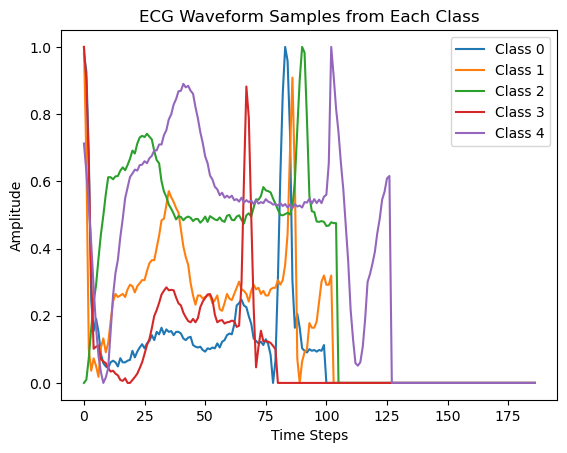

In [108]:
for label in np.unique(y_train):
    index = np.where(y_train == label)[0][0]
    plt.plot(X_train.iloc[index], label=f"Class {int(label)}")
    
plt.title("ECG Waveform Samples from Each Class")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

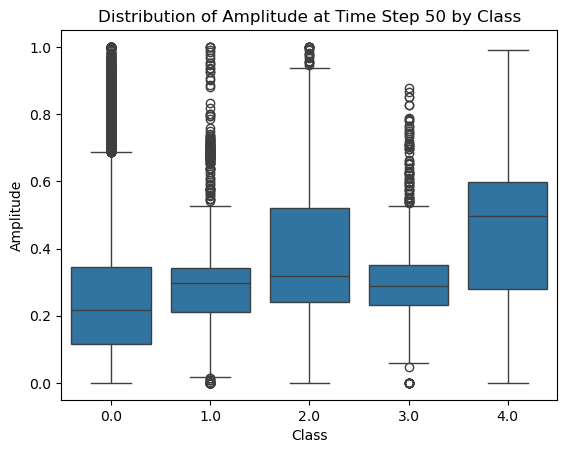

In [109]:
df = pd.DataFrame(X_train)
df['label'] = y_train

# Time step 50 (for example)
sns.boxplot(data=df, x='label', y=50)
plt.title("Distribution of Amplitude at Time Step 50 by Class")
plt.xlabel("Class")
plt.ylabel("Amplitude")
plt.show()

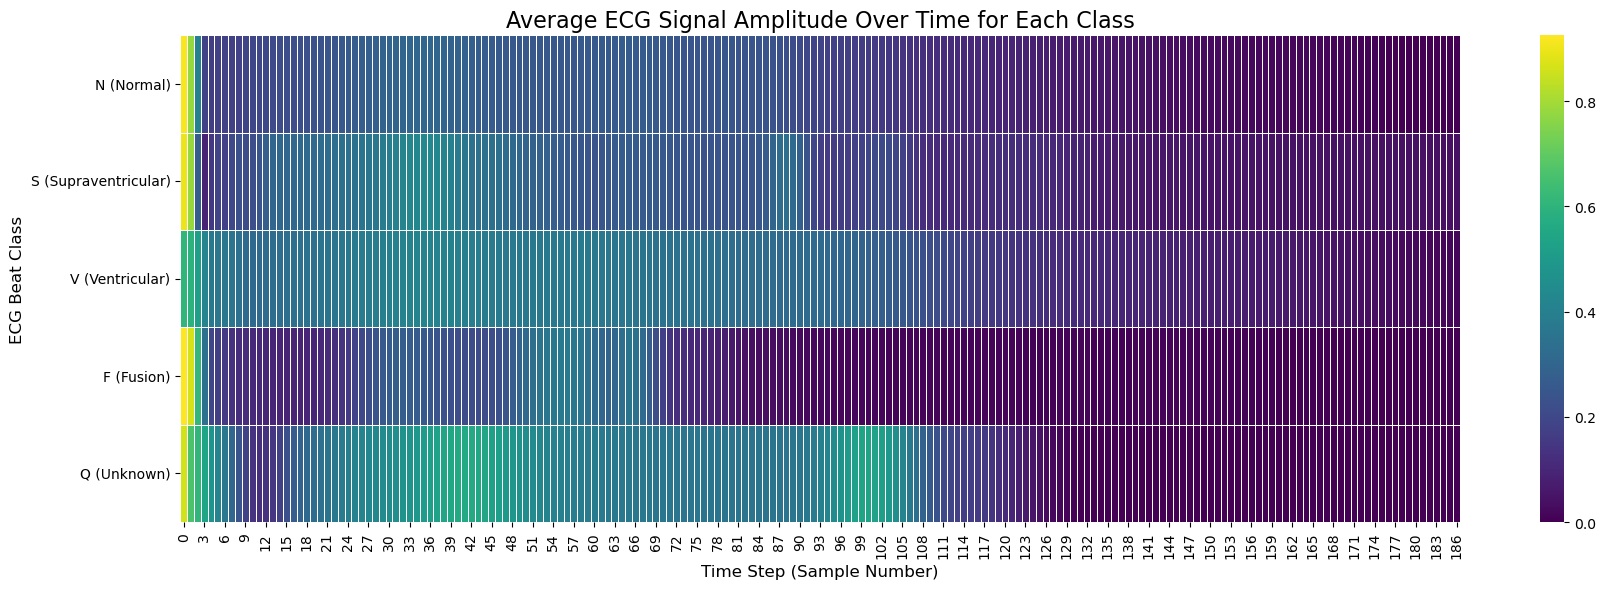

In [110]:
# Proceed only if data was loaded successfully
if X_train is not None:
    # Combine training features and labels for grouping
    train_df = X_train.copy()
    train_df['label'] = y_train

    # Define class names (based on MIT-BIH dataset documentation)
    # 0: Normal beat (N)
    # 1: Supraventricular ectopic beat (S)
    # 2: Ventricular ectopic beat (V)
    # 3: Fusion beat (F)
    # 4: Unknown beat (Q)
    class_names = {
        0: 'N (Normal)',
        1: 'S (Supraventricular)',
        2: 'V (Ventricular)',
        3: 'F (Fusion)',
        4: 'Q (Unknown)'
    }

    # Calculate the mean signal for each class
    # Group by the label and calculate the mean for each column (time step)
    mean_signals = train_df.groupby('label').mean()

    # Map the numerical index (labels) to descriptive names for the heatmap rows
    mean_signals.index = mean_signals.index.map(class_names)

    # Create the heatmap
    plt.figure(figsize=(18, 6)) # Adjust figure size as needed
    sns.heatmap(mean_signals, cmap='viridis', linewidths=.5) # Choose a colormap (e.g., 'viridis', 'coolwarm')

    plt.title('Average ECG Signal Amplitude Over Time for Each Class', fontsize=16)
    plt.xlabel('Time Step (Sample Number)', fontsize=12)
    plt.ylabel('ECG Beat Class', fontsize=12)
    plt.yticks(rotation=0) # Keep class labels horizontal
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("Data loading failed. Cannot generate heatmap.")

In [111]:
if X_train is not None:
    # Define class names (based on MIT-BIH dataset documentation)
    class_names_map = {
        0: 'N (Normal)',
        1: 'S (Supraventricular)',
        2: 'V (Ventricular)',
        3: 'F (Fusion)',
        4: 'Q (Unknown)'
    }

    # Combine X_train and y_train for easier processing
    df_train = X_train.copy()
    df_train['label'] = y_train
    df_train['class_name'] = df_train['label'].map(class_names_map)

    # --- Prepare data for Seaborn's lineplot ---
    # We need to "melt" the DataFrame to have a long format:
    # one row per observation (time point per sample)
    # with columns for 'time_step', 'amplitude', and 'class_name'

    # Add an instance_id to keep track of individual ECG signals
    df_train['instance_id'] = df_train.index

    # Melt the DataFrame
    # Keep 'instance_id', 'label', 'class_name' as id_vars
    # The feature columns (time steps) become 'time_step' and 'amplitude'
    time_series_columns = [col for col in X_train.columns] # these are 0, 1, 2, ... 186

    df_long = pd.melt(df_train,
                      id_vars=['instance_id', 'label', 'class_name'],
                      value_vars=time_series_columns,
                      var_name='time_step',
                      value_name='amplitude')

    # Convert time_step to numeric if it's not already (it should be from column names)
    df_long['time_step'] = df_long['time_step'].astype(int)


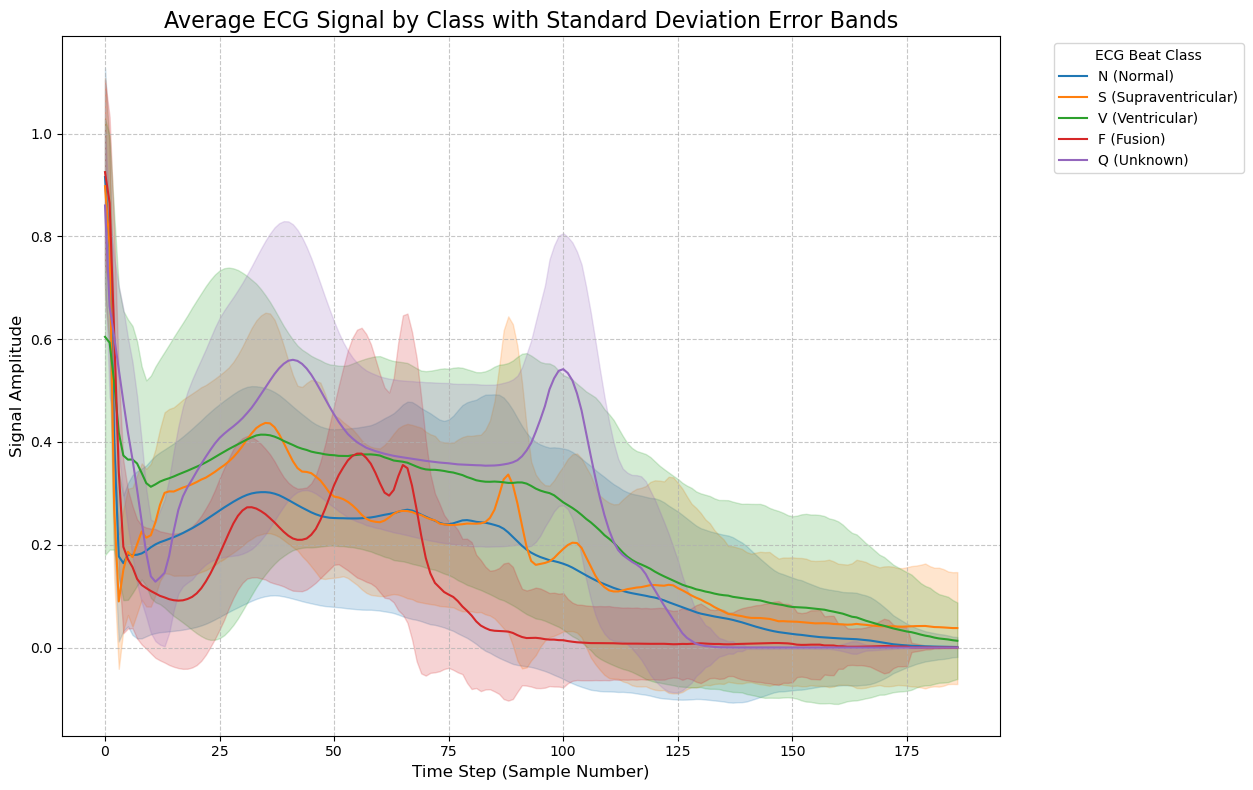

In [112]:
# --- Create the plot ---
plt.figure(figsize=(15, 8))

# sns.lineplot will plot the mean and by default a 95% confidence interval (ci=95)
# To show standard deviation instead, use ci='sd'
# To show no error band, use ci=None
sns.lineplot(data=df_long,
                x='time_step',
                y='amplitude',
                hue='class_name',  # Different line for each class
                errorbar='sd',           # Show standard deviation as error band
                # units='instance_id', estimator=None, lw=0.1, # For plotting all individual lines (can be too busy)
                )

plt.title('Average ECG Signal by Class with Standard Deviation Error Bands', fontsize=16)
plt.xlabel('Time Step (Sample Number)', fontsize=12)
plt.ylabel('Signal Amplitude', fontsize=12)
plt.legend(title='ECG Beat Class', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()


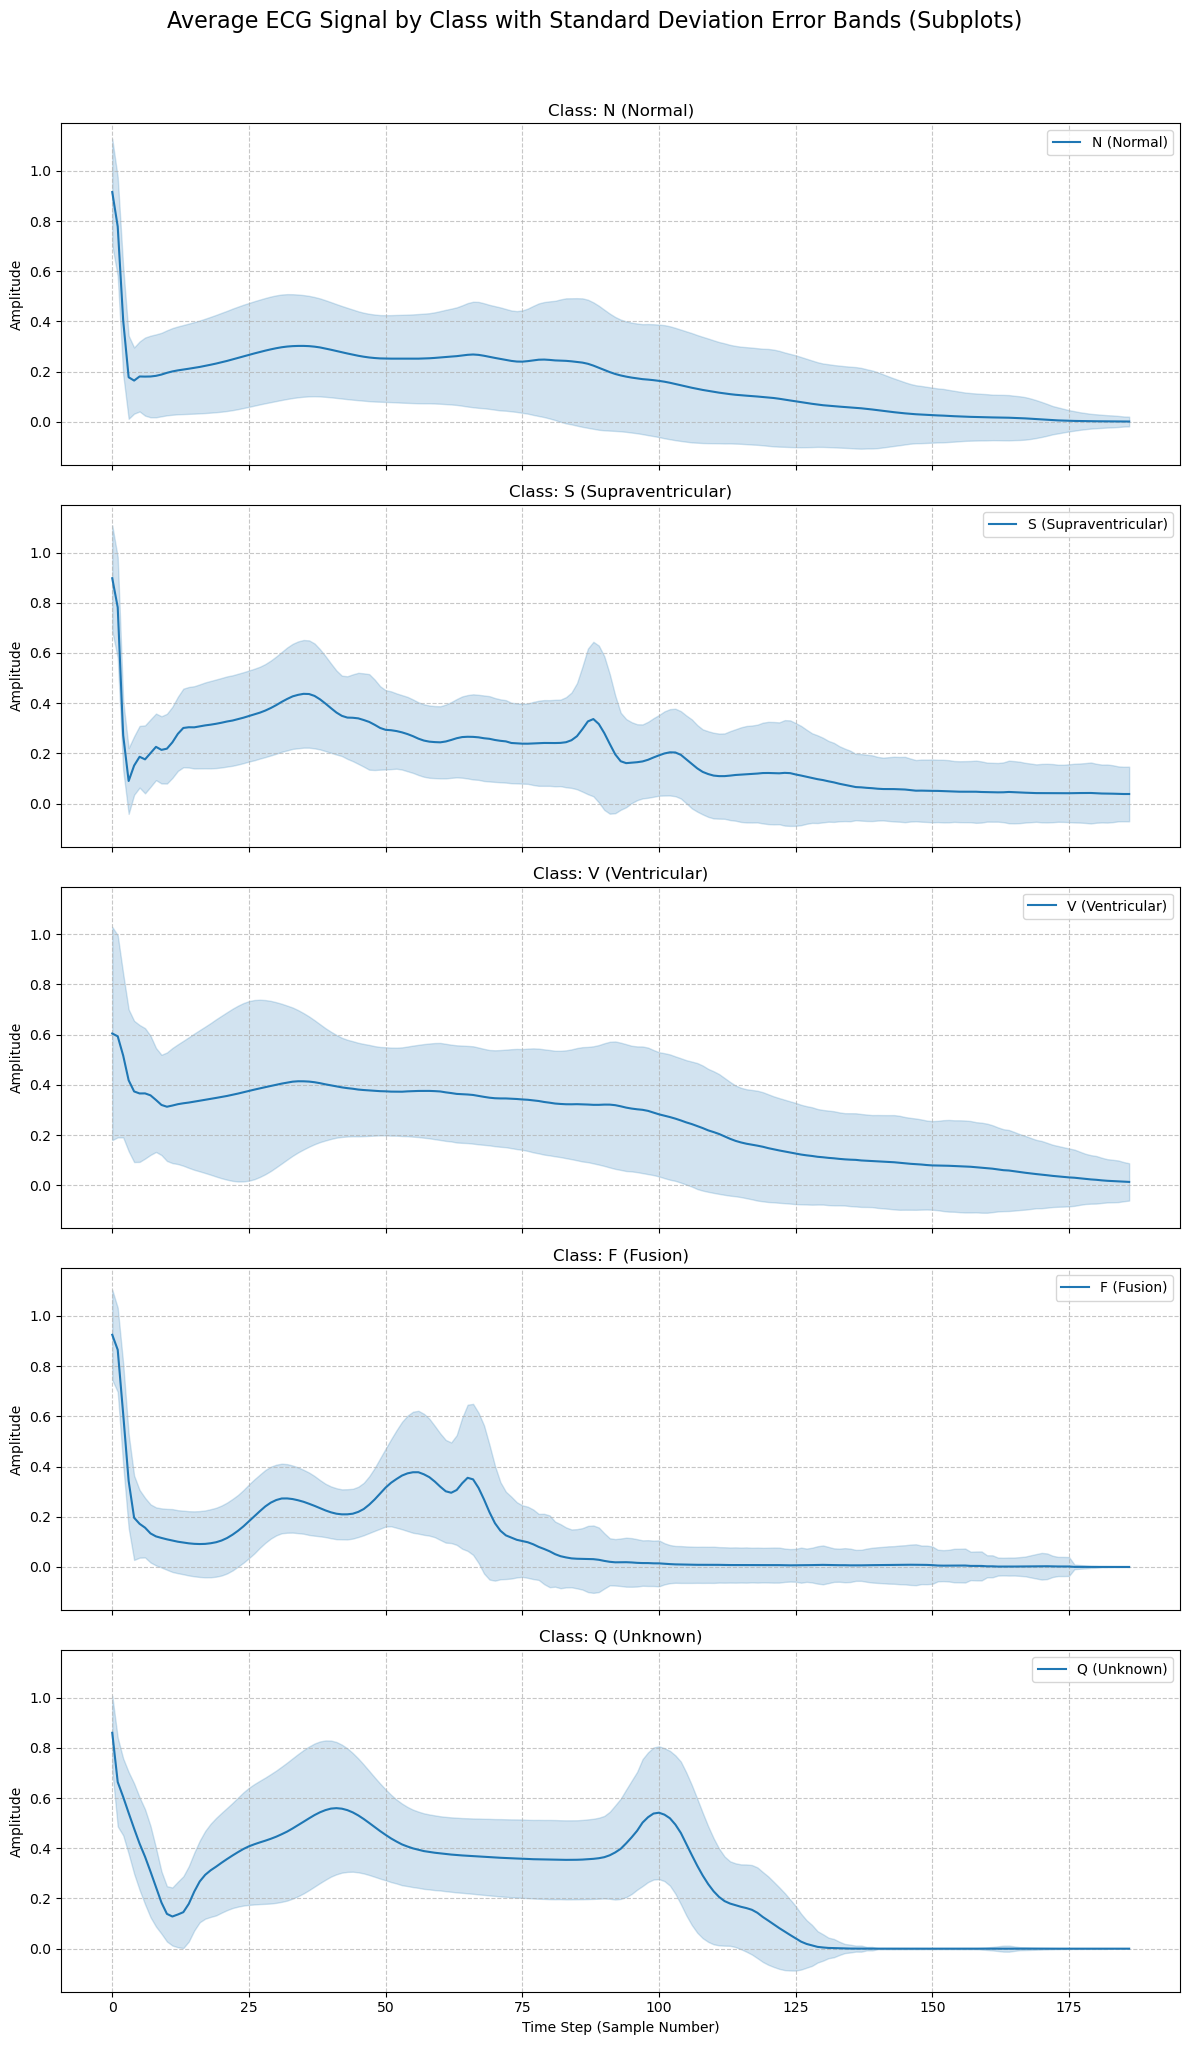

In [113]:
#--- Alternative: Plotting each class in a separate subplot (if the above is too cluttered) ---
unique_classes = sorted(df_train['label'].unique())
num_classes = len(unique_classes)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 4 * num_classes), sharex=True, sharey=True)
if num_classes == 1: # Handle case with only one class
    axes = [axes]

for i, label_val in enumerate(unique_classes):
    class_df_long = df_long[df_long['label'] == label_val]
    sns.lineplot(data=class_df_long,
                 x='time_step',
                 y='amplitude',
                 errorbar='sd',
                 ax=axes[i],
                 label=class_names_map[label_val])
    axes[i].set_title(f'Class: {class_names_map[label_val]}')
    axes[i].set_ylabel('Amplitude')
    axes[i].grid(True, linestyle='--', alpha=0.7)

axes[-1].set_xlabel('Time Step (Sample Number)')
fig.suptitle('Average ECG Signal by Class with Standard Deviation Error Bands (Subplots)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

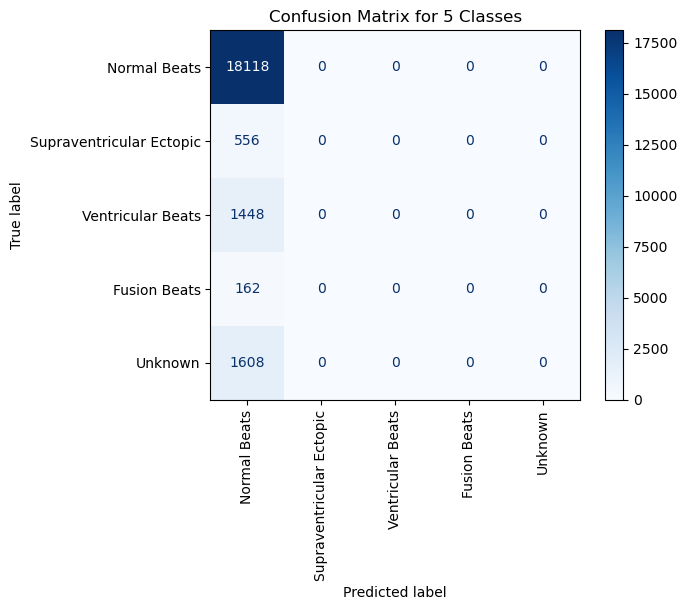

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure y_test is defined
if 'y_test' not in locals():
	_, X_test, _, y_test = load_data(path)

# Replace 'predictions' with the actual predictions from your model
predictions = [0] * len(y_test)  # Placeholder: Replace with actual model predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3, 4])

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal Beats', 'Supraventricular Ectopic', 'Ventricular Beats', 'Fusion Beats', 'Unknown'])
cmd.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix for 5 Classes')
plt.show()

Explained variance ratio for all components: [3.26834841e-01 1.60227797e-01 6.56161868e-02 4.73865473e-02
 3.51610873e-02 2.69601210e-02 2.18927756e-02 1.79984524e-02
 1.57103208e-02 1.44172951e-02 1.38904401e-02 1.34681500e-02
 1.23523677e-02 1.12583356e-02 1.02936516e-02 9.79603638e-03
 9.44379638e-03 8.56428243e-03 8.19746649e-03 7.92984538e-03
 7.39735388e-03 7.17331166e-03 6.79370590e-03 6.58165748e-03
 6.32024735e-03 6.00689816e-03 5.69335491e-03 5.43963939e-03
 5.25531139e-03 4.95966670e-03 4.75583521e-03 4.57942864e-03
 4.24332523e-03 4.14529713e-03 3.95940052e-03 3.84054237e-03
 3.80804874e-03 3.65562745e-03 3.47481008e-03 3.17342401e-03
 2.88261750e-03 2.57661698e-03 2.32709553e-03 2.19403111e-03
 2.12413022e-03 2.03587233e-03 1.97303333e-03 1.88899121e-03
 1.78378828e-03 1.66913267e-03 1.53304623e-03 1.51562531e-03
 1.42182823e-03 1.34513546e-03 1.27727867e-03 1.24286771e-03
 1.20869886e-03 1.11735080e-03 1.06765445e-03 9.93586279e-04
 9.10620870e-04 8.61820080e-04 8.4722083

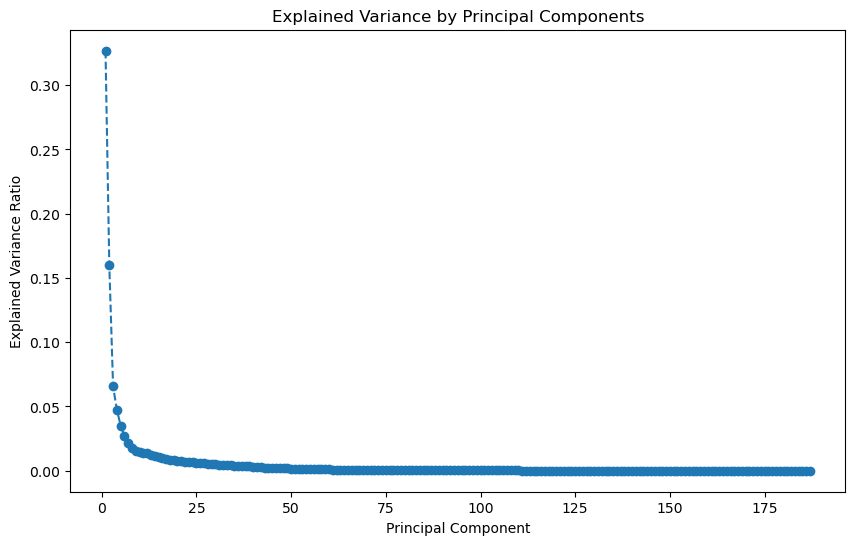

Correlation Matrix:
          0         1         2         3         4         5         6    \
0    1.000000 -0.144666 -0.177616 -0.152790 -0.096287 -0.065342 -0.055155   
1   -0.144666  1.000000  0.751248  0.500707  0.305988  0.212290  0.181973   
2   -0.177616  0.751248  1.000000  0.838487  0.622316  0.472374  0.384922   
3   -0.152790  0.500707  0.838487  1.000000  0.872682  0.688740  0.561711   
4   -0.096287  0.305988  0.622316  0.872682  1.000000  0.894447  0.763733   
..        ...       ...       ...       ...       ...       ...       ...   
182  0.001748 -0.005430  0.004487  0.013047  0.006255 -0.001191 -0.005762   
183  0.000728 -0.013417 -0.002900  0.013421  0.011019  0.002726 -0.002896   
184 -0.005034 -0.004618 -0.008378 -0.004828 -0.007734 -0.012645 -0.018201   
185 -0.005019 -0.004243 -0.008054 -0.004500 -0.007586 -0.012545 -0.018111   
186       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9    ...       177       

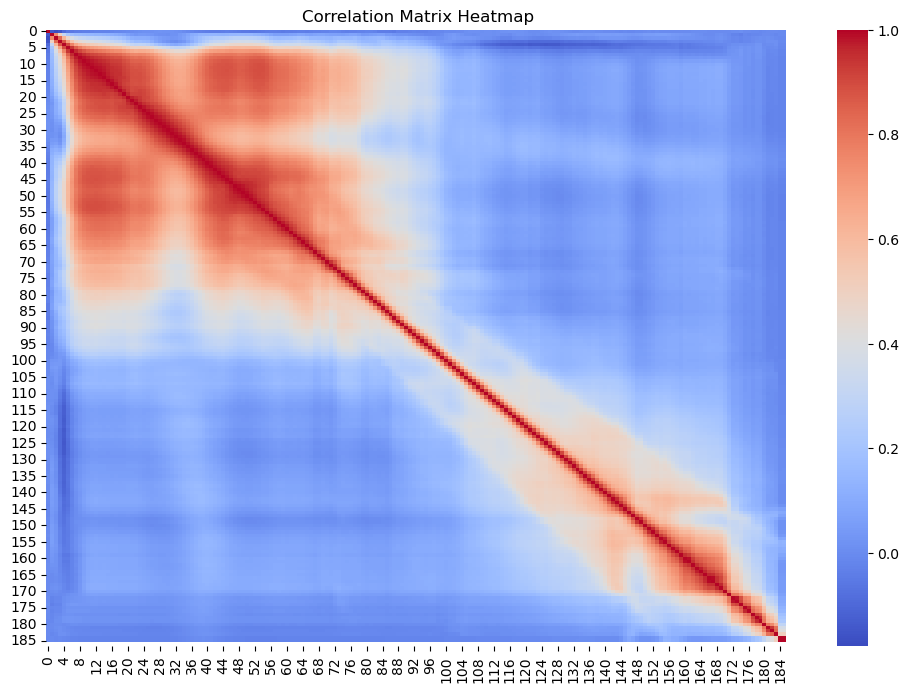

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()  # Retain all components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio for all components
print("Explained variance ratio for all components:", pca.explained_variance_ratio_)

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled).corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()